In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf

from datetime import datetime
import numpy as np
import os

In [ ]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load data file
data = pd.read_csv('/content/drive/MyDrive/Studio_AIA/Data_240528.csv')
pd.options.display.max_columns = None

print(data)

          id  WallOffset      Xaxis       Yaxis      AVG_Lux        W01  \
0          1         1.0  15.992144 -145.858053   973.636250  16.389308   
1          2         1.0   0.990397 -145.858053   951.092500   3.675065   
2          3         1.0  15.992144 -141.857210   964.147500  16.018954   
3          4         1.0   0.990397 -141.857210   944.867500   1.226207   
4          5         1.1  15.892144 -145.758053  1107.775000  16.270484   
...      ...         ...        ...         ...          ...        ...   
17549  17550         1.9   1.890397 -142.757210   954.224667   2.006407   
17550  17551         1.0  15.992144 -145.858053   973.636250  16.389308   
17551  17552         1.0   0.990397 -145.858053   951.092500   3.675065   
17552  17553         1.0  15.992144 -141.857210   964.147500  16.018954   
17553  17554         1.0   0.990397 -141.857210   944.867500   1.226207   

             W02        W03  
0      16.135617  16.018202  
1       2.292344   1.225592  
2      16

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17554 entries, 0 to 17553
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          17554 non-null  int64  
 1   WallOffset  17554 non-null  float64
 2   Xaxis       17554 non-null  float64
 3   Yaxis       17554 non-null  float64
 4   AVG_Lux     17554 non-null  float64
 5   W01         17554 non-null  float64
 6   W02         17554 non-null  float64
 7   W03         17554 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 1.1 MB
None


In [ ]:
for colname, col in data.items():
  print(colname, "min_val", col.min(), "max_val", col.max())

id min_val 1 max_val 17554
WallOffset min_val 1.0 max_val 1.9
Xaxis min_val 0.990397 max_val 15.992144
Yaxis min_val -145.858053 max_val -141.85721
AVG_Lux min_val 199.37625 max_val 1674.4375
W01 min_val 1.226207 max_val 16.389308
W02 min_val 1.119447 max_val 16.135618
W03 min_val 1.225592 max_val 16.388574


In [ ]:
data.describe()

,id,WallOffset,Xaxis,Yaxis,AVG_Lux,W01,W02,W03
count,17554.000000,17554.000000,17554.000000,17554.000000,17554.000000,17554.000000,17554.000000,17554.000000
mean,8777.500000,1.449897,8.491271,-143.857632,576.665768,8.865678,8.694985,8.864988
std,5067.547648,0.287284,4.817813,1.311315,393.892347,4.595880,4.676500,4.595821
min,1.000000,1.000000,0.990397,-145.858053,199.376250,1.226207,1.119447,1.225592
25%,4389.250000,1.200000,4.324119,-145.158053,244.655333,4.770446,4.561284,4.769768
50%,8777.500000,1.400000,8.491271,-143.857632,371.764000,8.648220,8.615846,8.647481
75%,13165.750000,1.700000,12.658423,-142.557210,1027.512667,12.834287,12.766199,12.833535
max,17554.000000,1.900000,15.992144,-141.857210,1674.437500,16.389308,16.135618,16.388574


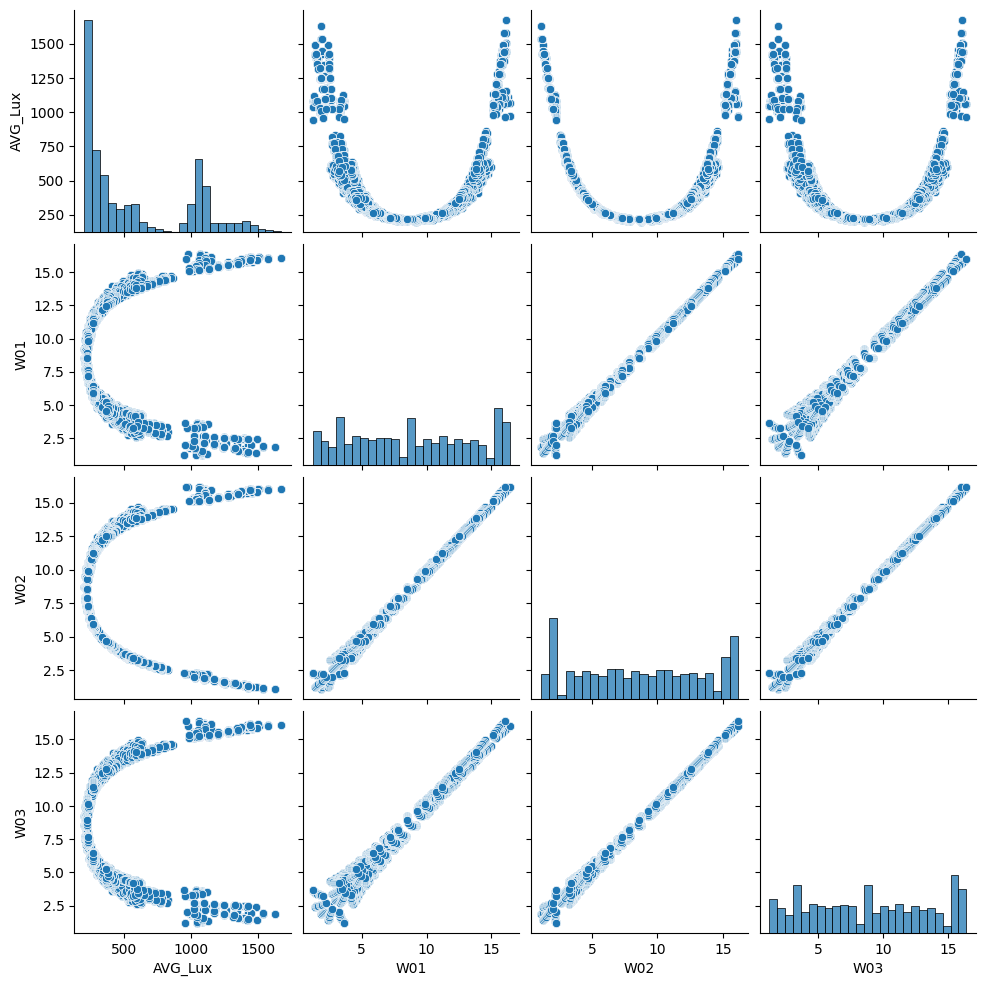

In [ ]:
data_numerical = data[["AVG_Lux", "W01", "W02", "W03"]]
sns.pairplot(data_numerical)

In [ ]:
#same code as last time

#declare features
X = data.iloc[:,5:8]

# Load and instantiate a StandardSclaer
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

# Apply the scaler to our X-features
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)
X

(17554, 3)


,W01,W02,W03
0,16.389308,16.135617,16.018202
1,3.675065,2.292344,1.225592
2,16.018954,16.135618,16.388574
3,1.226207,2.292346,3.674862
4,16.270484,16.024275,15.915471
...,...,...,...
17549,2.006407,2.253205,3.259653
17550,16.389308,16.135617,16.018202
17551,3.675065,2.292344,1.225592
17552,16.018954,16.135618,16.388574


In [ ]:
#declare regression target
y = data.loc[:,"AVG_Lux"].to_numpy()

y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()


#In this case it makes sense to use MinMax scaling because the wage seems like a relative range
# Apply the scaler to our Y-features
y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)
y

(17554, 1)


array([[973.63625],
       [951.0925 ],
       [964.1475 ],
       ...,
       [951.0925 ],
       [964.1475 ],
       [944.8675 ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 21)

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)


TRAIN input (14043, 3) output (14043, 1)
TEST input (3511, 3) output (3511, 1)


In [ ]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]

model.add(tf.keras.layers.Dense(4, input_shape=(n_cols,), activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))

# Add a dense layer with 1 value output
model.add(tf.keras.layers.Dense(1, activation= "sigmoid"))

# Compile your model
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 16        
                                                                 
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 29 (116.00 Byte)
Trainable params: 29 (116.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=500, validation_split=0.2)

Epoch 1/500
352/352 [==============================] - 2s 4ms/step - loss: 0.1011 - val_loss: 0.0744
Epoch 2/500
352/352 [==============================] - 1s 3ms/step - loss: 0.0443 - val_loss: 0.0259
Epoch 3/500
352/352 [==============================] - 1s 3ms/step - loss: 0.0203 - val_loss: 0.0153
Epoch 4/500
352/352 [==============================] - 3s 7ms/step - loss: 0.0124 - val_loss: 0.0096
Epoch 5/500
352/352 [==============================] - 2s 6ms/step - loss: 0.0079 - val_loss: 0.0063
Epoch 6/500
352/352 [==============================] - 2s 7ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 7/500
352/352 [==============================] - 1s 4ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 8/500
352/352 [==============================] - 1s 4ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 9/500
352/352 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/500
352/352 [==============================] - 1s 4ms/step - loss: 0.0026 - val_lo

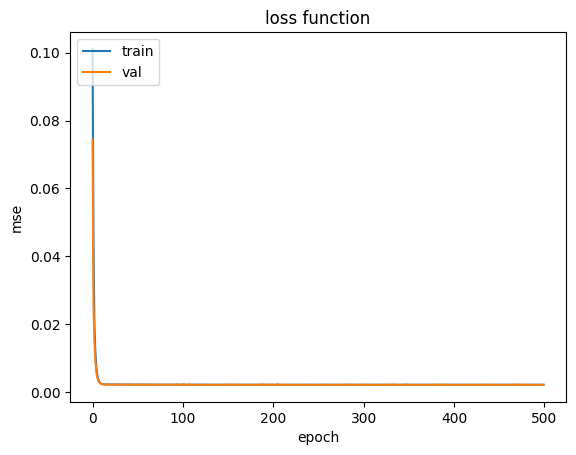

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate your model accuracy on the test data
loss_test = model.evaluate(X_test,y_test)

# Print accuracy
print('mse_test:', loss_test)

110/110 [==============================] - 1s 4ms/step - loss: 0.0021
mse_test: 0.002083930652588606


In [ ]:
def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color = "red", label = "truth",linestyle='None', marker = "o", markersize = 5)
  ax1.plot(x_val, pred, color = "blue", label = "pred",linestyle='None', marker = "o", markersize = 4, alpha = 0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

110/110 [==============================] - 0s 2ms/step


(0.0, 40.0)

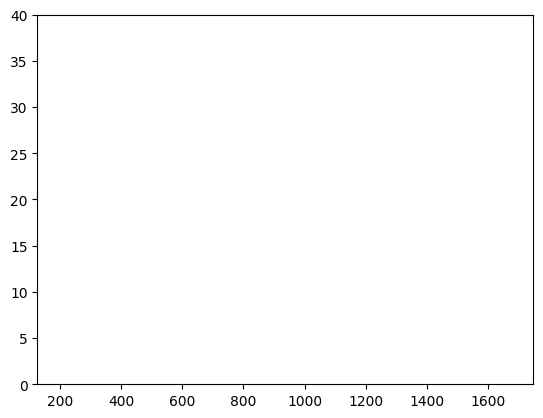

In [ ]:
y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth,y_pred)
plt.ylim(0,40)

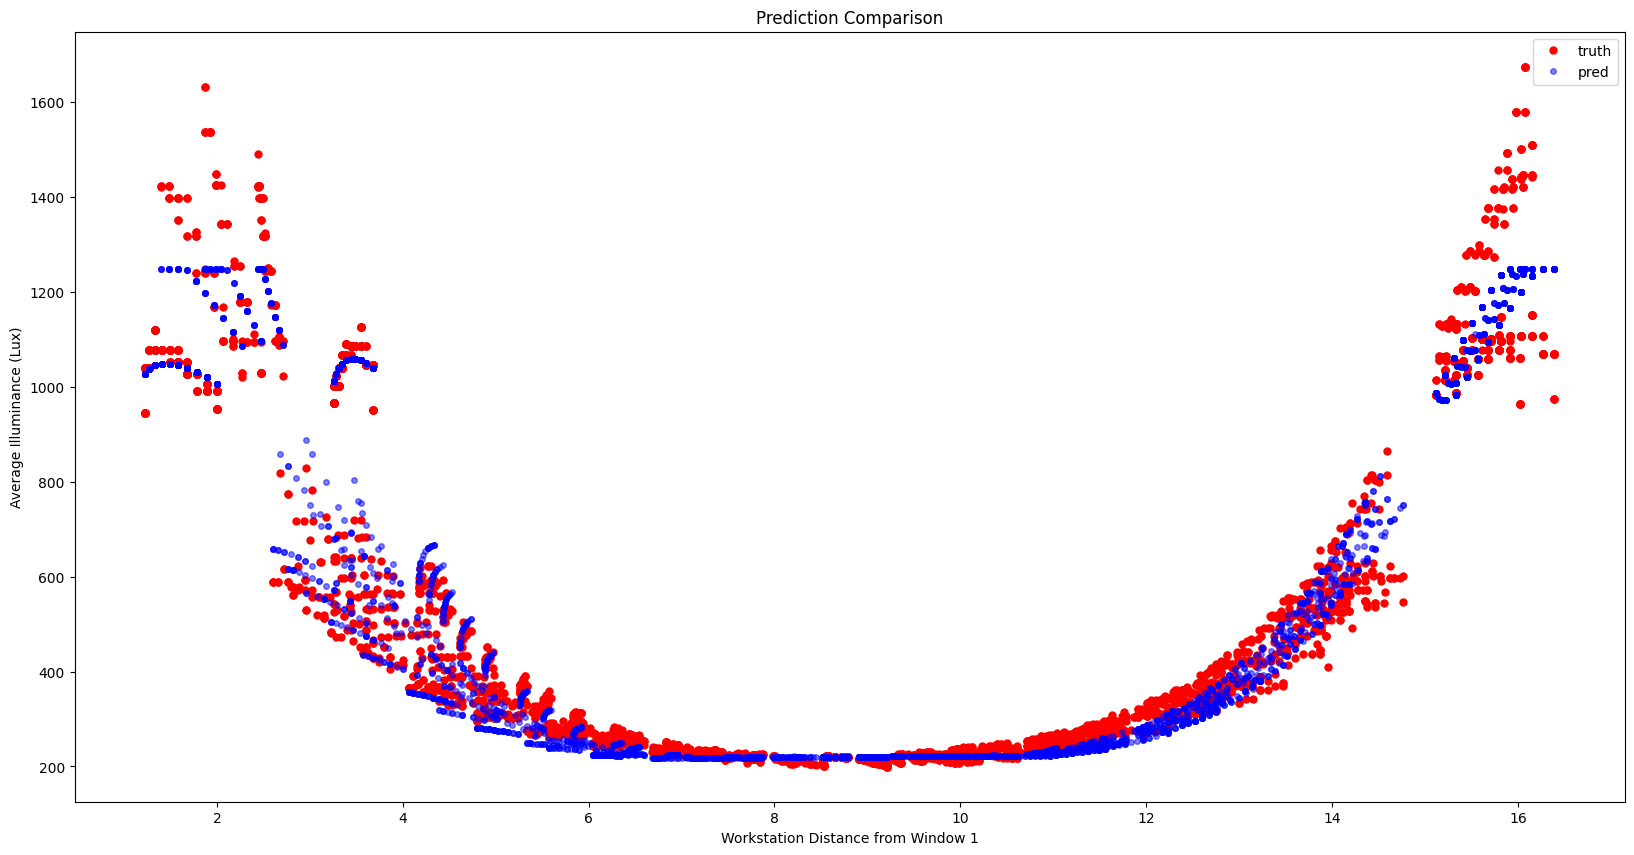

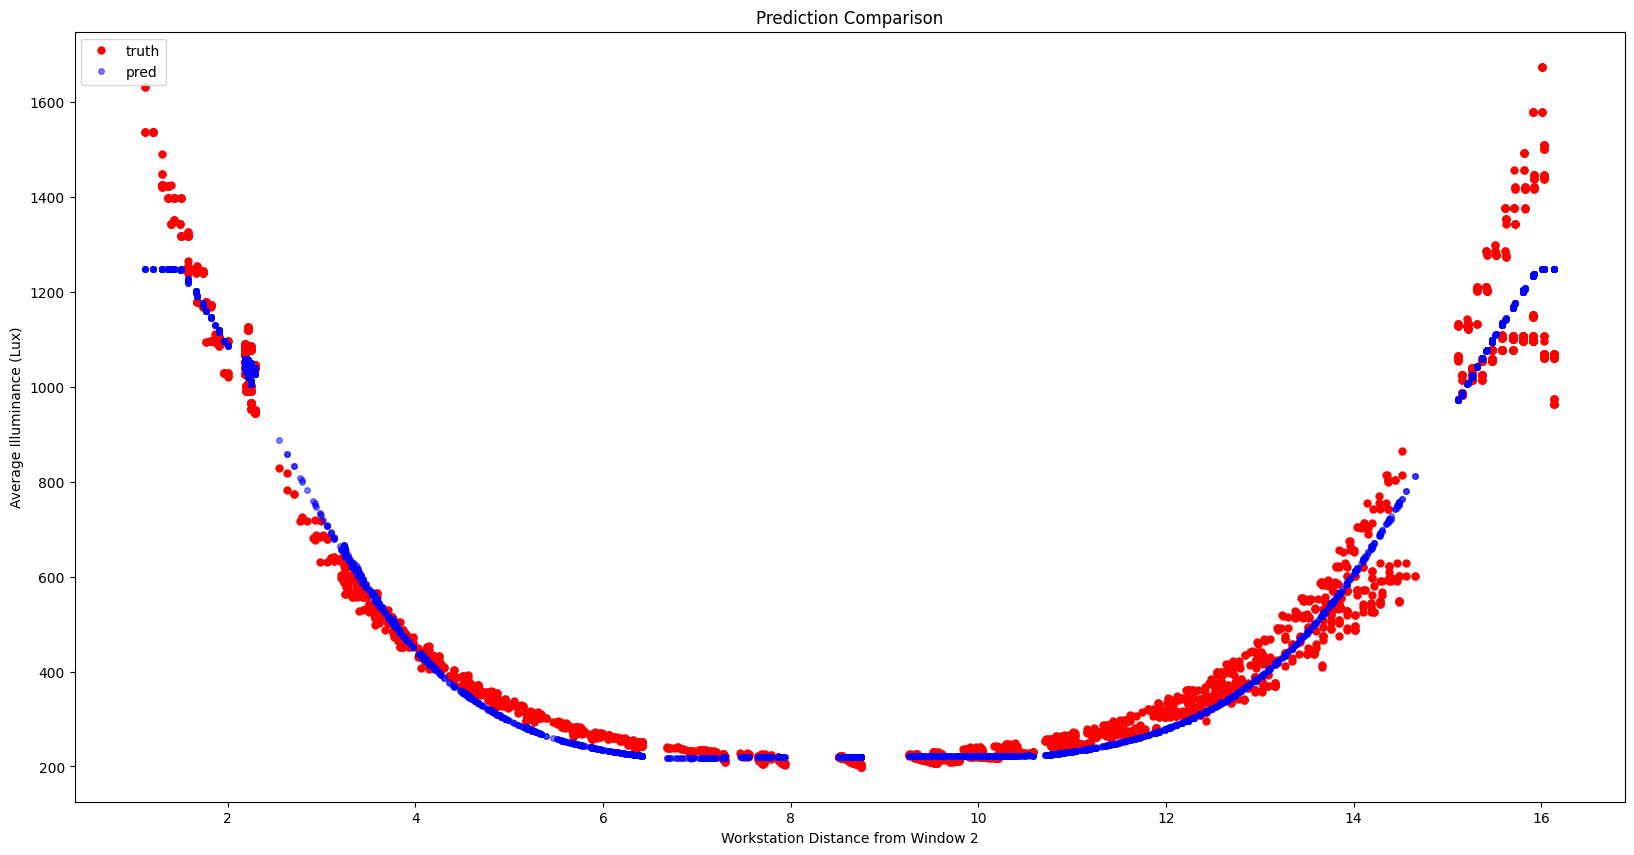

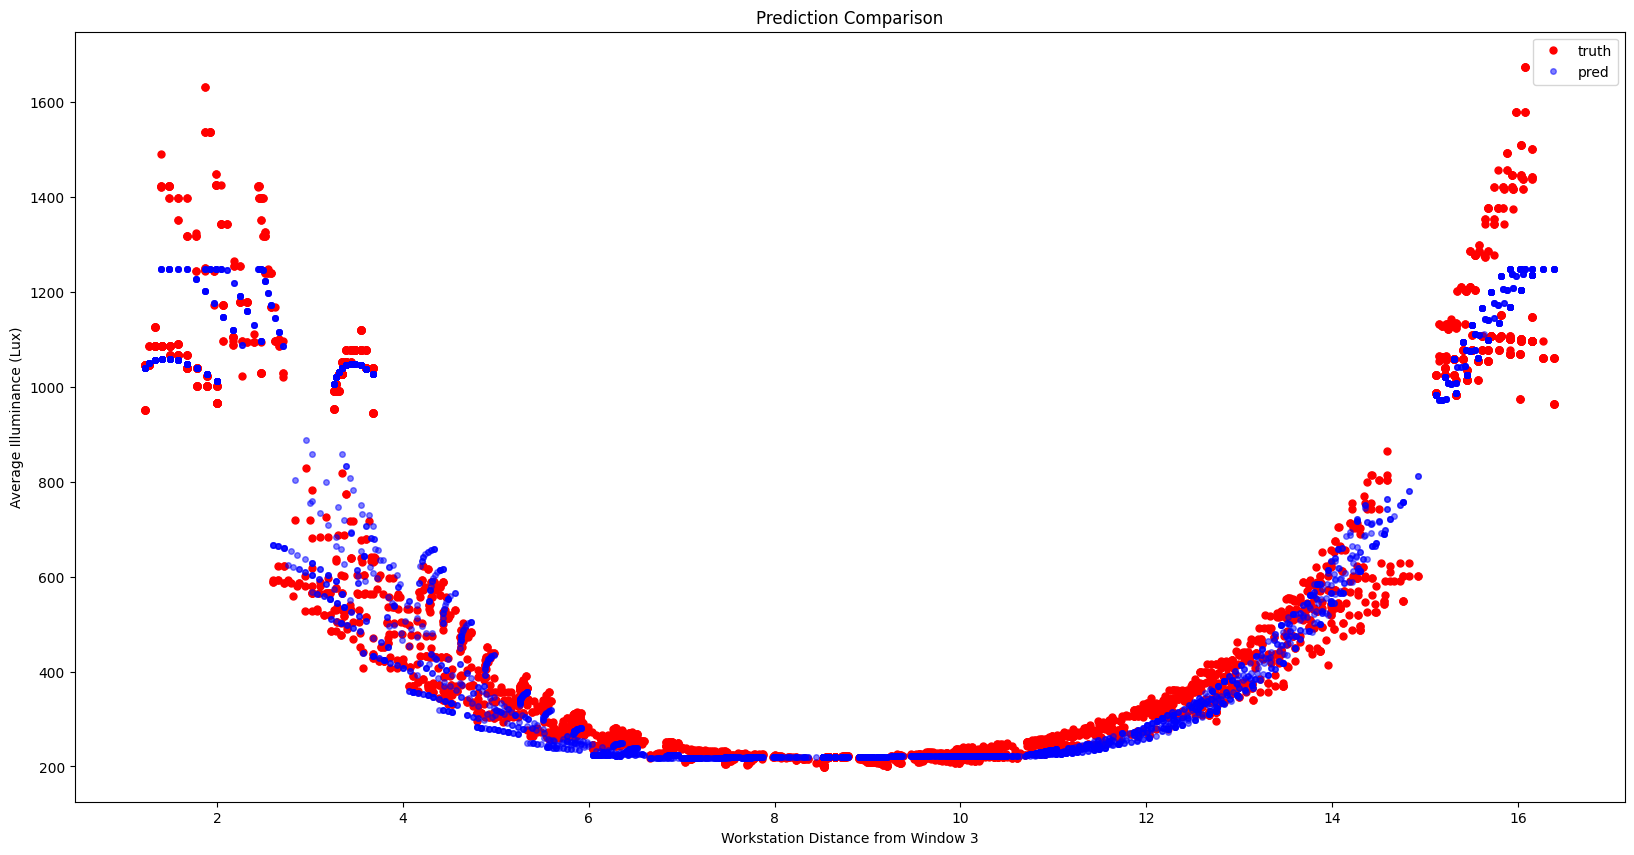

In [ ]:
W01_test = (scalerX.inverse_transform(X_test)[:,0])

W02_test = (scalerX.inverse_transform(X_test)[:,1])

W03_test = (scalerX.inverse_transform(X_test)[:,2])

plot_comparison(W01_test, y_pred, y_truth, "Workstation Distance from Window 1", "Average Illuminance (Lux)")
plot_comparison(W02_test, y_pred, y_truth,  "Workstation Distance from Window 2", "Average Illuminance (Lux)")
plot_comparison(W03_test, y_pred, y_truth,  "Workstation Distance from Window 3", "Average Illuminance (Lux)")

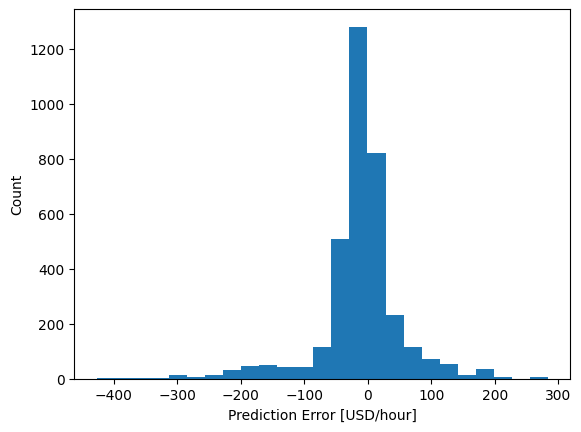

In [ ]:
error = y_pred - y_truth
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [USD/hour]')
_ = plt.ylabel('Count')

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Studio_AIA/Data_240528.csv", index_col=0)
#test = pd.read_csv("../kaggle_data/test.csv", index_col=0)
train.head()

,WallOffset,Xaxis,Yaxis,AVG_Lux,W01,W02,W03
id,,,,,,,
1,1.0,15.992144,-145.858053,973.63625,16.389308,16.135617,16.018202
2,1.0,0.990397,-145.858053,951.09250,3.675065,2.292344,1.225592
3,1.0,15.992144,-141.857210,964.14750,16.018954,16.135618,16.388574
4,1.0,0.990397,-141.857210,944.86750,1.226207,2.292346,3.674862
5,1.1,15.892144,-145.758053,1107.77500,16.270484,16.024275,15.915471


In [ ]:
def create_prediction_file(results:list | np.ndarray, results_dir="./"):
    """
    Function that formats predictions and writes them to a .csv file ready for submission.

    :param: results         results to write to the file, list | array
    :param: results_dir     directory to write the results file to, str, default current working directory
                            make sure the directory exists before writing the files there.

    """
    csv_fname = "results_{}.csv".format(datetime.now().strftime('%b%d_%H-%M-%S'))
    with open(os.path.join(results_dir, csv_fname), 'w') as f:
        f.write('id,AVG_Lux\n')
        for i, value in enumerate(results):
            f.write(str(i) + ',' + str(max(0, value)) + '\n')
    return True

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

reg = LinearRegression(positive=True).fit(train[["id", "X", "Y"]], train["AVG_Lux"])
res = reg.predict(test[["id", "X","Y"]])

KeyError: "None of [Index(['id', 'X', 'Y'], dtype='object')] are in the [columns]"